# Práctica 1

### Parte 1: Aplicacion de técnicas de brillo, contraste y ecualizado

Librerías necesarias:

In [3]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import skimage.io
from skimage import exposure

L


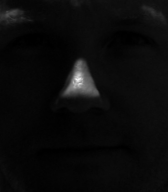

In [2]:
im = Image.open("face1.png")
print(im.mode)
im

[ 420  574 1106 1949 2699 3035 3566 2761 2460 2185 2235 2139 2128 1503
  743  377  223  138   94  101   80   66   58   44   66   45   37   46
   33   29   37   31   41   32   33   27   26   29   27   28   24   19
   19   16   18   11   13   19   16   17   12    9   11    8   13    7
   13    8   11   11   15    8    6   13   10   15    9    9   10    7
    9    7   13   12    7   10   10    6    8    9   12   10    7    9
   15    7   10   13   13    6    5    8   11    8   15    7    7   11
    6    8   14   11   12    8    9    6   13    6   11    7    5    6
   10    4    5   10    1    6    2    5   10    3    5    2    3    5
    3    4    3    6    1    3    2    5    3    2    1    3    2    4
    1    3    0    2    2    2    1    3    4    5    0    4    3    3
    3    1    0    1    1    4    1    1    3    1    5    3    1    2
    3    2    3    2    2    0    1    2    0    0    4    4    1    2
    0    4    2    1    1    2    1    1    1    0    1    0    1    0
    1 

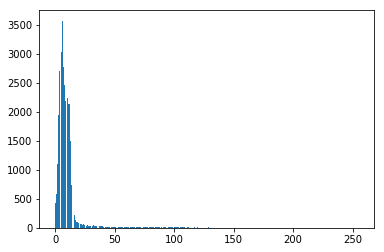

In [3]:
I = np.asarray(im)
hist = np.histogram(I, bins = 256, range = (0,255))
print(hist[0])
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

L


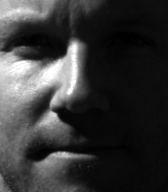

In [4]:
im2 = Image.open("face2.png")
print(im2.mode)
im2

[  60  129  179  202  283  384  695 1076 1825 2080 2023 1982 2252 1829
 1009  547  316  222  247  204  185  181  179  143  155  126  123  105
   92  112   95   87   88   86   89   97   99   96  102   91   98   80
   92   99   99   98   84   85  107   92  113  110   78  107  110  100
  105  108   94   81   95   94   98   84   93   85   81   88   74   77
  105   86   92  104   84   92  106   81   86  111  103  109   96  112
   88   88   90   99   87   91   92   80   90   87   75   79   91   86
   85   78  102   88   74   84   84   82   98   84   85   87   69   67
   48   64   74   70   49   49   46   47   47   56   41   37   49   44
   43   38   34   39   47   48   47   47   47   45   39   42   49   50
   47   42   49   47   44   34   38   40   32   34   33   48   34   47
   47   35   31   35   36   45   35   44   38   50   39   30   38   35
   36   32   36   38   45   50   35   38   42   41   37   36   44   36
   44   34   44   29   53   55   57   54   55   60   72   62   82   68
   62 

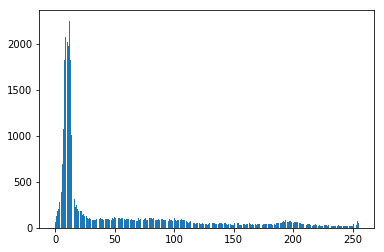

In [90]:
I2 = np.asarray(im2)
hist = np.histogram(I2, bins = 256, range = (0,255))
print(hist[0])
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

Brillo y contraste:

In [6]:
def BrilloContraste(I, alfa, beta):
    I2 = (I*alfa) + beta
    I2 = np.clip(I2,0,255)
    I2 = np.uint8(I2)
    return I2


Streatching:

In [1]:
def Transform():
    arr = np.linspace(start = 0, stop = 255, num = 256, dtype = int)
    h = np.zeros(256, dtype = int)
    for elem in arr:
        if elem < 16:
            h[elem] = elem * 8
        
        elif elem <32:
            h[elem] = h[15] + (elem - 15) * 4
        
        else:
            h[elem] = h[31] + (elem - 31) 
            
        if h[elem] > 255:
            h[elem] = 255
    
    return h
        
def Stretching(I,H):
    I2 = np.empty(I.shape, dtype = int)
    for row in range(I.shape[0]):
        for col in range(I.shape[1]):
            I2[row, col] = H[I[row, col]]
    
    I2 = np.uint8(I2)
    return I2

Text(0,0.5,'H[g]')

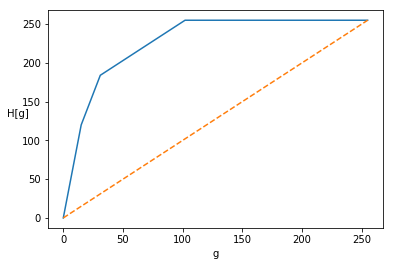

In [10]:
H = Transform() 
plt.figure()
x = range(0,256)
plt.plot(x, H)
plt.plot(x, x, linestyle='--') 
plt.xlabel("g")
plt.ylabel("H[g]", rotation = 0)

Ecualización:

In [10]:
def Ecualizado(I):
    I2 = np.empty((I.shape[0], I.shape[1]), dtype = int)
    f = [np.count_nonzero(I <= i) for i in range(256)]
    H = [(255.0/I.size) * f[g] for g in range(0,256)]
    for row in range(I.shape[0]):
        for col in range(I.shape[1]):
            I2[row, col] = H[I[row, col]]
            
    I2 = np.uint8(I2)
    return I2

Ecualizado Local:

In [11]:
def EcualizadoLocal(I, window):
    hi = exposure.equalize_adapthist(I,window)
    im = plt.imshow(hi, cmap = "gray")
    return im


Ahora aplicamos las técnicas sobre las imágenes anteriores.

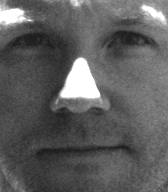

In [27]:
S1 = BrilloContraste(I, 7.0, 32)
Image.fromarray(S1)


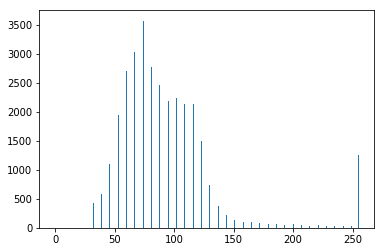

In [32]:
hist = np.histogram(S1, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

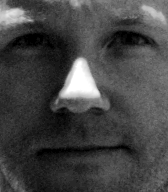

In [129]:
S2 = Stretching(I,H)
Image.fromarray(S2)

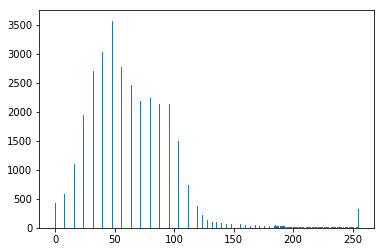

In [130]:
hist = np.histogram(S2, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

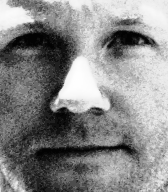

In [29]:
S3 = Ecualizado(I)
Image.fromarray(S3)

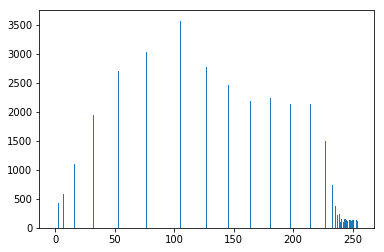

In [31]:
hist = np.histogram(S3, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

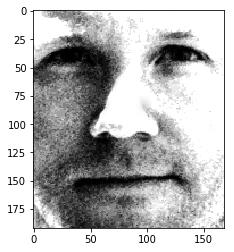

In [46]:
S4 = EcualizadoLocal(S3,10)
S4

Aplicamos las técnicas a la segunda imagen:

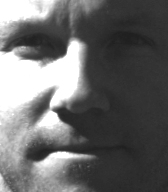

In [85]:
S5 = BrilloContraste(I2, 1.5, 32)
Image.fromarray(S5)


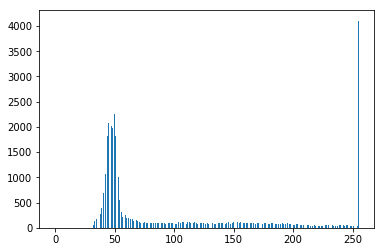

In [86]:
hist = np.histogram(S5, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

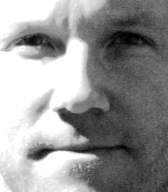

In [131]:
S6 = Stretching(I2,H)
Image.fromarray(S6)   

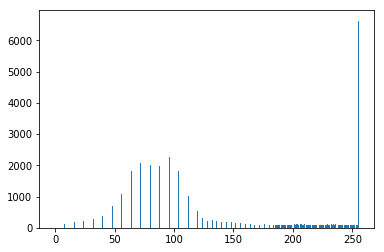

In [132]:
hist = np.histogram(S6, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

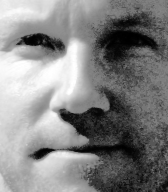

In [92]:
S7 = Ecualizado(I2)
Image.fromarray(S7)

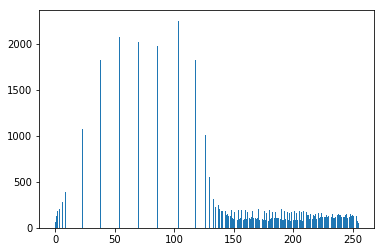

In [93]:
hist = np.histogram(S7, bins = 256, range = (0,255))
plt.figure()
plt.bar(range(0,256), hist[0])
plt.show()

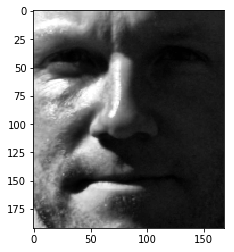

In [110]:
S8 = EcualizadoLocal(I2,50)
S8